## Analysis

In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("CUDA devices:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("Device name:", torch.cuda.get_device_name(0))
    print("Current device index:", torch.cuda.current_device())

CUDA available: True
CUDA devices: 1
Device name: NVIDIA L4
Current device index: 0


In [17]:
import json
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def analyze_jsonl(path):
    """
    Đọc file .jsonl và trả về DataFrame:
    scholarship_name | url_count | urls
    """
    data = defaultdict(set)

    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            obj = json.loads(line)
            name = obj.get("scholarship_name")
            url = obj.get("url")
            if name and url:
                data[name].add(url)

    df = pd.DataFrame([
        {"scholarship_name": name, "url_count": len(urls), "urls": list(urls)}
        for name, urls in data.items()
    ])

    return df

In [4]:
bachelor_path = "../output/old12-official-FullBachelor/rag_database_bachelor.jsonl"
master_path   = "../output/old12-official-FullMaster/rag_database_master.jsonl"
phd_path      = "../output/old12-official-FullPhd/rag_database_phd.jsonl"

In [19]:
df_bachelor = analyze_jsonl(bachelor_path)
df_master   = analyze_jsonl(master_path)
df_phd      = analyze_jsonl(phd_path)

dfs = {
    "Bachelor": df_bachelor,
    "Master": df_master,
    "PhD": df_phd
}

In [20]:
def print_stats(name, df):
    print(f"\n===== {name} Scholarships =====")
    print(f"Tổng số scholarship: {len(df)}")
    print(f"Min URLs: {df['url_count'].min()}")
    print(f"Max URLs: {df['url_count'].max()}")
    print(f"Average URLs: {df['url_count'].mean():.2f}")

In [21]:
df_all = pd.concat([
    df_bachelor.assign(level="Bachelor"),
    df_master.assign(level="Master"),
    df_phd.assign(level="PhD"),
])

print("\n===== Tổng hợp toàn bộ =====")
print(f"Tổng scholarship: {len(df_all)}")
print(f"Min URLs: {df_all['url_count'].min()}")
print(f"Max URLs: {df_all['url_count'].max()}")
print(f"Average URLs: {df_all['url_count'].mean():.2f}")

df_all.head()



===== Tổng hợp toàn bộ =====
Tổng scholarship: 403
Min URLs: 9
Max URLs: 45
Average URLs: 21.77


,scholarship_name,url_count,urls,level
0,Edinburgh Global Undergraduate Mathematics Sch...,17,[https://www.opportunitiescircle.com/edinburgh...,Bachelor
1,NUS ASEAN Undergraduate Scholarship,22,[https://www.reddit.com/r/nus/comments/1d8q8rv...,Bachelor
2,NUS Global Merit Scholarship,20,[https://www.scholarschoice.com.sg/scholarship...,Bachelor
3,Lester B. Pearson International Scholarship,19,[https://www.facebook.com/grabopp/posts/the-le...,Bachelor
4,Clark University Global Scholars Program,15,[https://www.facebook.com/ScholarshipsAds/post...,Bachelor


## Visulaize

In [11]:
def print_stats_pretty(level, df):
    print(f"\n🎓 {level} Scholarships")
    print("-" * 40)
    print(f"🔢 Tổng số scholarship: {len(df)}")
    print(f"📉 Min URLs     : {df['url_count'].min()}")
    print(f"📈 Max URLs     : {df['url_count'].max()}")
    print(f"📊 Average URLs : {df['url_count'].mean():.2f}")

In [12]:
print_stats_pretty("Bachelor", df_bachelor)
print_stats_pretty("Master", df_master)
print_stats_pretty("PhD", df_phd)


🎓 Bachelor Scholarships
----------------------------------------
🔢 Tổng số scholarship: 133
📉 Min URLs     : 9
📈 Max URLs     : 28
📊 Average URLs : 20.66

🎓 Master Scholarships
----------------------------------------
🔢 Tổng số scholarship: 212
📉 Min URLs     : 10
📈 Max URLs     : 45
📊 Average URLs : 22.53

🎓 PhD Scholarships
----------------------------------------
🔢 Tổng số scholarship: 58
📉 Min URLs     : 9
📈 Max URLs     : 29
📊 Average URLs : 21.50


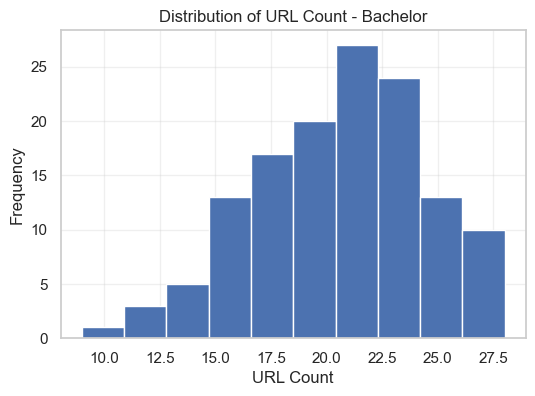

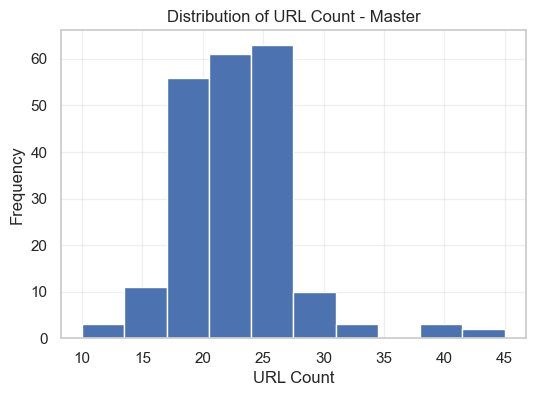

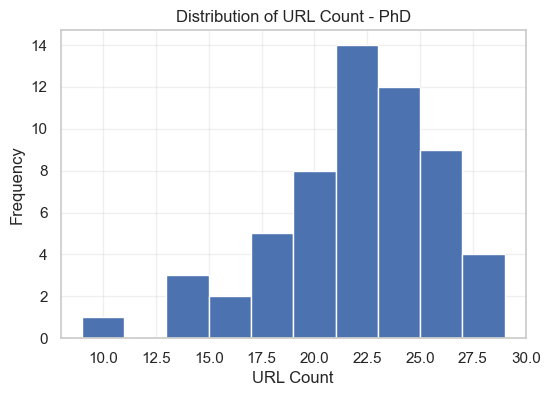

In [22]:
plt.figure(figsize=(6, 4))
plt.hist(df_bachelor["url_count"], bins=10)
plt.title("Distribution of URL Count - Bachelor")
plt.xlabel("URL Count")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(df_master["url_count"], bins=10)
plt.title("Distribution of URL Count - Master")
plt.xlabel("URL Count")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(6, 4))
plt.hist(df_phd["url_count"], bins=10)
plt.title("Distribution of URL Count - PhD")
plt.xlabel("URL Count")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()


In [ ]:

# Set một theme nhẹ nhàng pastel
sns.set_theme(style="whitegrid")

# Custom palette riêng cho 3 cấp độ
palette = {
    "Bachelor": "#8EC5FC",  # xanh pastel nhạt
    "Master":   "#4B7BE5",  # xanh đậm hơn tí
    "PhD":      "#AEC9FF",  # xanh tím nhẹ
}

def pretty_boxplot(df, level):
    plt.figure(figsize=(4.8, 5))
    
    sns.boxplot(
        data=df,
        y="url_count",
        color=palette[level],
        width=0.35,
        boxprops=dict(alpha=0.8, linewidth=1.6),
        whiskerprops=dict(linewidth=1.4),
        medianprops=dict(color="#1C1C1C", linewidth=1.8),
        capprops=dict(linewidth=1.4),
        flierprops=dict(marker="o", markersize=5, alpha=0.55)
    )
    
    plt.title(f"URL Count Distribution – {level}", fontsize=14, weight="bold")
    plt.ylabel("URL Count")
    plt.xticks([])  # Ẩn số 1 bên dưới cho sạch
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()


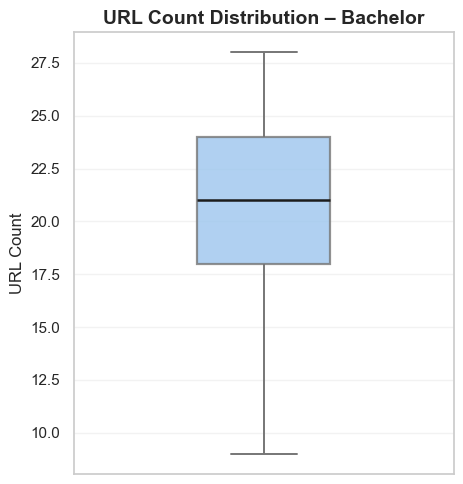

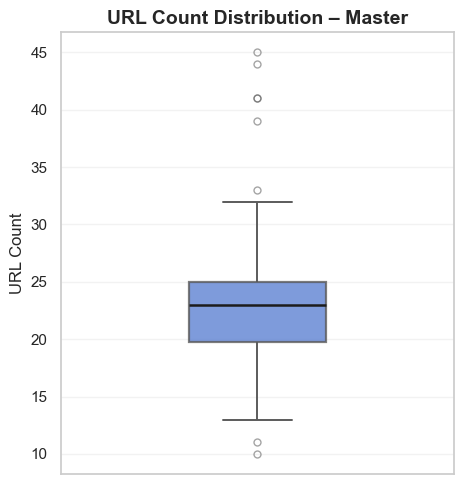

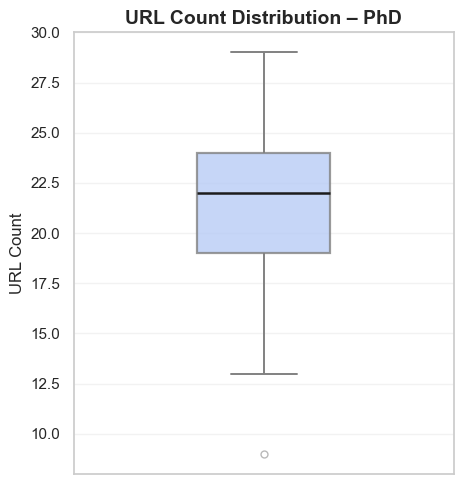

In [16]:
pretty_boxplot(df_bachelor, "Bachelor")
pretty_boxplot(df_master, "Master")
pretty_boxplot(df_phd, "PhD")
